In [17]:
import geopandas as gpd
from simpledbf import Dbf5
import time
from glob import glob
import pandas as pd

In [18]:
fi = r"D:\projects\RD\night_fire\modis_fire_points\DL_FIRE_M6_50643\fire_archive_M6_50643.dbf"
shp_fi = r"D:\projects\RD\night_fire\modis_fire_points\DL_FIRE_M6_50643\fire_archive_M6_50643.shp"

In [ ]:
fire_pts_folders = !ls -d ../modis_fire_points/*
dbf_files = [glob(folder + '/*.dbf')[0] for folder in fire_pts_folders]

years, type0, type1, type2, type3 = [], [], [], [], []
for fi in [dbf_files[-1]]:
    dbf = Dbf5(fi)
    df_dbf = dbf.to_dataframe()
    
    types = df_dbf.groupby('TYPE')
    try:
        year = int(df_dbf.ACQ_DATE[0].split('-')[0])
    except:
        year = df_dbf.ACQ_DATE[0].year
        
    years.append(year)
    type0.append(list(types)[0][1].shape[0])
    type1.append(list(types)[1][1].shape[0])
    type2.append(list(types)[2][1].shape[0])
    type3.append(list(types)[3][1].shape[0])
    
    print('on year {}'.format(year))
    for name, grp in types:
        print('TYPE: {}, size: {}    {:.2f}'.format(name, grp.shape[0], grp.shape[0]/df_dbf.shape[0]))
    
    
    df_type0 = df_dbf.query('TYPE == 0')
    for conf in [0,10,20,30]:
        df_sub = df_type0.query('CONFIDENCE > {}'.format(conf))
        print('confidence > {}, using {:.2f}% of data'.format(conf, (df_sub.shape[0]/df_type0.shape[0])*100))
    print('******************************')

In [ ]:
counts_df = pd.DataFrame({'year': years, 'type0':type0, 'type1':type1, 'type2':type2, 'type3':type3})

In [ ]:
fire_pts_folders = !ls -d ../modis_fire_points/*
dbf_files = [glob(folder + '/*.dbf')[0] for folder in fire_pts_folders]

#years, day_counts, night_counts = [], [], []
for fi in [dbf_files[-1]]:
    dbf = Dbf5(fi)
    df_dbf = dbf.to_dataframe()
    
    types = df_dbf.groupby('TYPE')
    try:
        year = int(df_dbf.ACQ_DATE[0].split('-')[0])
    except:
        year = df_dbf.ACQ_DATE[0].year
    
    print('year', year)
    years.append(year)
    df_type0 = df_dbf.query('TYPE == 0')
    df_type0 = df_type0.query('CONFIDENCE > 10')
    dn = df_type0.groupby('DAYNIGHT')
    day_counts.append(list(dn)[0][1].shape[0])
    night_counts.append(list(dn)[1][1].shape[0])
    

In [25]:
years = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2012,2013,2014,2015,2016,2017,2018,2011]
counts_df = pd.DataFrame({'year': years, 'day':day_counts, 'night':night_counts})

In [26]:
counts_df = counts_df.sort_values(by='year')
counts_df['total'] = counts_df.day + counts_df.night

In [36]:
counts_df['perc_night'] = (counts_df.night / counts_df.total) * 100
counts_df

,year,day,night,total,perc_night
0,2000,216110,36244,252354,14.362364
1,2001,1360115,332842,1692957,19.660393
2,2002,3041897,532486,3574383,14.897284
3,2003,4435733,534195,4969928,10.748546
4,2004,4363529,527870,4891399,10.791800
5,2005,4392495,534441,4926936,10.847330
6,2006,4039160,469404,4508564,10.411386
7,2007,4405623,558259,4963882,11.246420
8,2008,4230696,432109,4662805,9.267147
9,2009,3903100,408237,4311337,9.468919


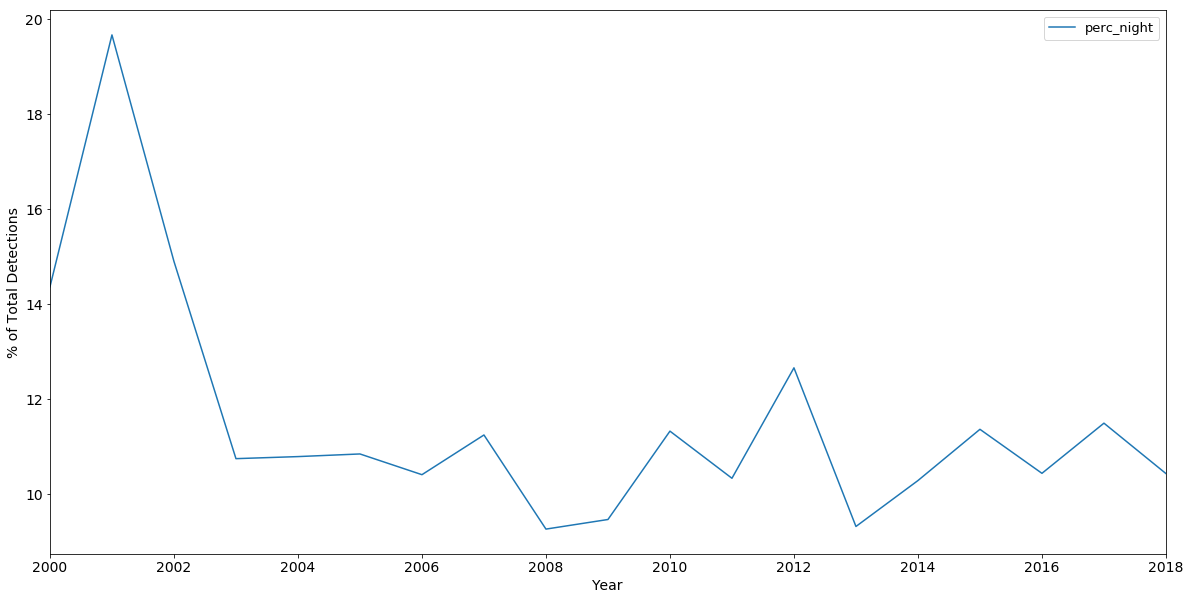

In [50]:
import matplotlib.pyplot as plt

counts_df.plot(kind='line', x='year', y='perc_night', figsize=(20,10), fontsize=14)
plt.ylabel('% of Total Detections', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.legend(fontsize=13)

In [40]:
(counts_df.night.sum() / counts_df.total.sum())*100, counts_df.perc_night.mean()

(11.077331228724576, 11.545730927075423)

(10.676964598978685, 10.653052889681588)

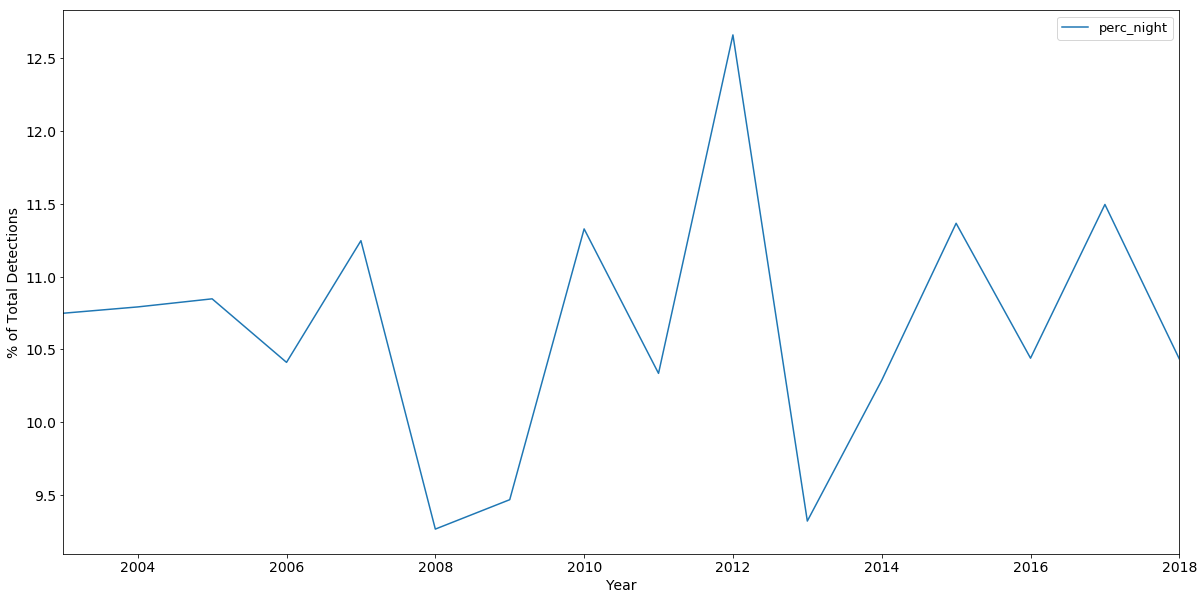

In [51]:
counts_2003_pres = counts_df.query('year >= 2003')

counts_2003_pres.plot(kind='line', x='year', y='perc_night', figsize=(20,10), fontsize=14)
plt.ylabel('% of Total Detections', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.legend(fontsize=13);

(counts_2003_pres.night.sum() / counts_2003_pres.total.sum())*100, counts_2003_pres.perc_night.mean()